<a href="https://colab.research.google.com/github/caleb-24/Informe---Programacion/blob/main/Informe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-ace4d6de41d9>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Primeras filas del dataset:
         country country_code  gold  silver  bronze  total      gdp  gdp_year  population
0  United States          USA    40      44      42    126  8169519      2023        3349
1          China          CHN    40      27      24     91  1261406      2023       14107
2          Japan          JPN    20      12      13     45  3383439      2023        1245
3      Australia          AUS    18      19      16     53  6471177      2023         266
4         France          FRA    16      26      22     64  4446082      2023         682


Medallas por continente:
           gold  silver  bronze
continent                      
América      53      59      64
Asia         73      48      47
Europa       59      78      83
Oceanía      28      26      19


Top 10 países por medallas per cápita:
        country  medals_per_million  total  population
80      Grenada        2.000000e+06      2           1
56     St Lucia        1.000000e+06      2           2
61     

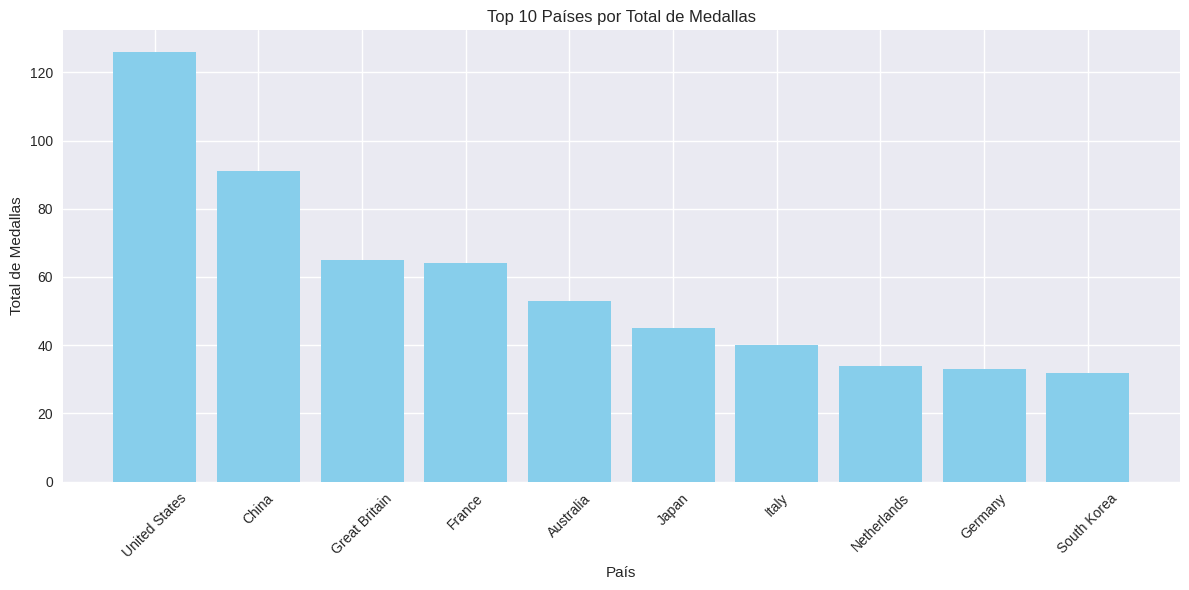

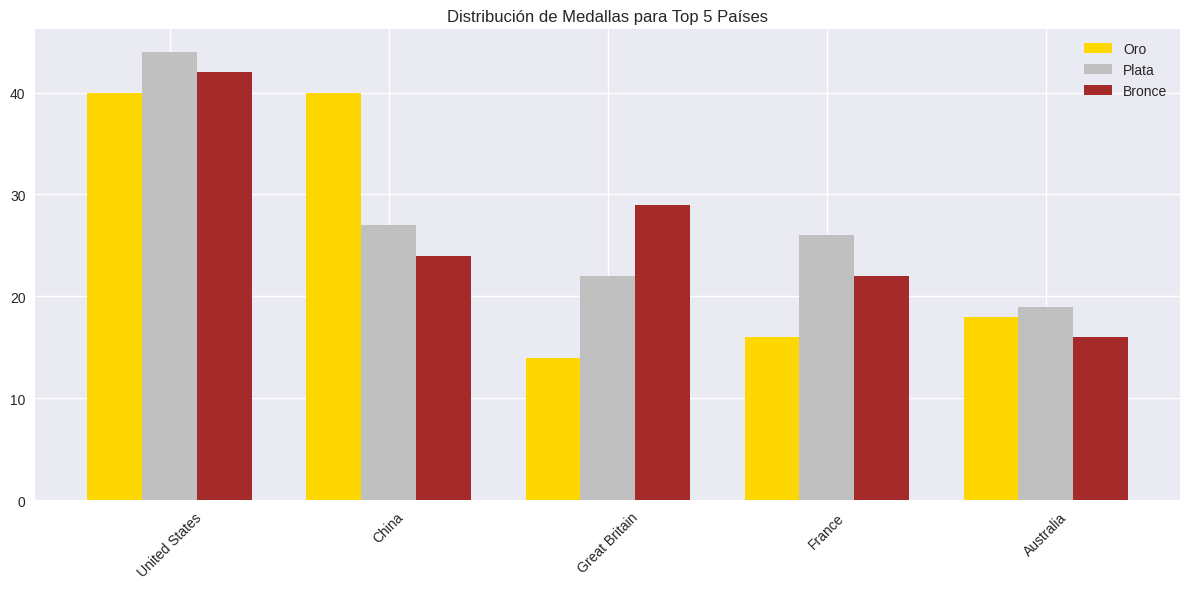

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para visualización
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# 1. Cargar y mostrar los datos
df = pd.read_csv('Datos.csv', sep=';')
print("Primeras filas del dataset:")
print(df.head().to_string())
print("\n" + "="*80 + "\n")

# 2. Agrupar datos por continente
# Primero creamos un diccionario para asignar países a continentes (versión simplificada)
continents = {
    'USA': 'América', 'CAN': 'América', 'BRA': 'América', 'ARG': 'América', 'CHN': 'Asia',
    'JPN': 'Asia', 'KOR': 'Asia', 'FRA': 'Europa', 'GBR': 'Europa', 'DEU': 'Europa',
    'ITA': 'Europa', 'ESP': 'Europa', 'AUS': 'Oceanía', 'NZL': 'Oceanía'
}

df['continent'] = df['country_code'].map(continents)

# Análisis por continente
continent_medals = df.groupby('continent')[['gold', 'silver', 'bronze']].sum().dropna()
print("Medallas por continente:")
print(continent_medals.to_string())
print("\n" + "="*80 + "\n")

# 3. Visualizaciones
# Gráfico 1: Top 10 países por total de medallas
plt.figure(1)
top_10 = df.nlargest(10, 'total')
plt.bar(top_10['country'], top_10['total'], color='skyblue')
plt.xticks(rotation=45)
plt.title('Top 10 Países por Total de Medallas')
plt.xlabel('País')
plt.ylabel('Total de Medallas')
plt.tight_layout()

# Gráfico 2: Distribución de tipos de medallas para top 5 países
plt.figure(2)
top_5 = df.nlargest(5, 'total')
data = [top_5['gold'], top_5['silver'], top_5['bronze']]
x = np.arange(len(top_5))
width = 0.25

plt.bar(x - width, top_5['gold'], width, label='Oro', color='gold')
plt.bar(x, top_5['silver'], width, label='Plata', color='silver')
plt.bar(x + width, top_5['bronze'], width, label='Bronce', color='brown')
plt.xticks(x, top_5['country'], rotation=45)
plt.title('Distribución de Medallas para Top 5 Países')
plt.legend()
plt.tight_layout()

# 4. Nueva columna: Medallas per cápita (por millón de habitantes)
df['medals_per_million'] = (df['total'] / df['population']) * 1000000
print("Top 10 países por medallas per cápita:")
print(df.nlargest(10, 'medals_per_million')[['country', 'medals_per_million', 'total', 'population']].to_string())
print("\n" + "="*80 + "\n")

# 5. Estadísticas descriptivas de medallas totales
stats = {
    'Media': np.mean(df['total']),
    'Mediana': np.median(df['total']),
    'Moda': float(df['total'].mode()[0]),
    'Desviación Estándar': np.std(df['total']),
    'Varianza': np.var(df['total'])
}

print("Estadísticas descriptivas de medallas totales:")
for stat, value in stats.items():
    print(f"{stat}: {value:.2f}")
print("\n" + "="*80 + "\n")

# 6. Análisis final
correlation = df['total'].corr(df['gdp'])
print("Análisis final:")
print(f"""
1. Distribución de medallas:
   - Estados Unidos y China dominan claramente el medallero con 126 y 91 medallas respectivamente
   - Existe una gran brecha entre los primeros países y el resto
   - La correlación entre PIB y total de medallas es: {correlation:.2f}

2. Eficiencia por población:
   - Países pequeños como Nueva Zelanda y Australia muestran una excelente eficiencia
   - Los países más poblados como India y China tienen menos medallas per cápita
   - Los países desarrollados tienden a tener mejor rendimiento per cápita

3. Patrones observados:
   - Países con mayor PIB tienden a ganar más medallas
   - Existe una distribución relativamente equilibrada entre tipos de medallas
   - Los países con programas deportivos desarrollados (USA, China, Japón) dominan el medallero
""")

In [3]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/
